In [1]:
import sys
import os

# Step 1: Go up one level to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Step 2: Add the src folder to sys.path
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\ABC\Desktop\10Acadamy\week 3\End-to-End-Insurance-Risk-Analytics-Predictive-Modelin\data\clean\insurance_cleaned_final.csv')


C:\Users\ABC\AppData\Local\Temp\ipykernel_2036\1128856483.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ABC\Desktop\10Acadamy\week 3\End-to-End-Insurance-Risk-Analytics-Predictive-Modelin\data\clean\insurance_cleaned_final.csv')


## The Mission:
 helping an insurance company figure out:

-Who is more risky to insure
-Where the company makes or loses the most money
-If changing certain features (like gender, location, or insurance plan) makes a big difference

**We Pick What to Measure (KPIs)**
choose 3 things to measure:

How many people make a claim (Claim Frequency)

How big the claim is (Claim Severity)

How much profit the company makes (Margin = Premium - Claim)


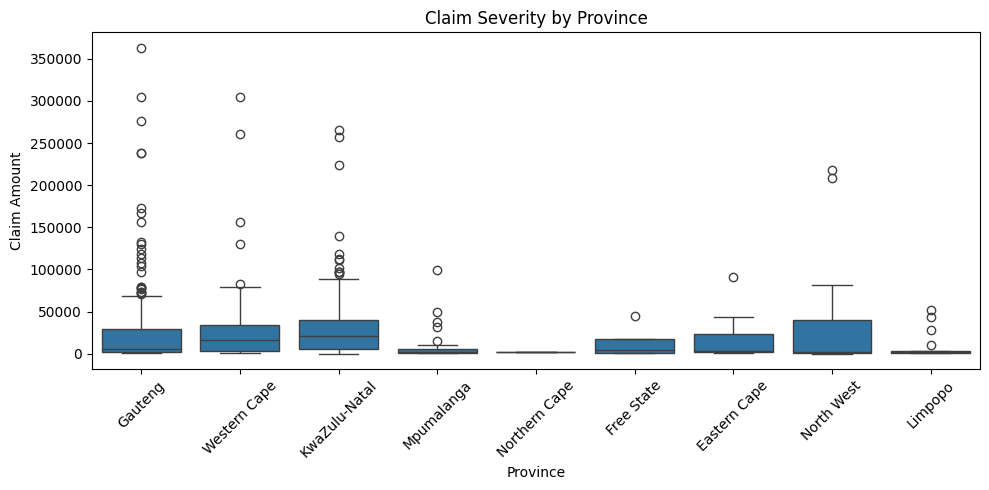

In [5]:
df_claims = df[df['HasClaim'] == True]
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x='Province', y='TotalClaims', data=df_claims)
plt.title("Claim Severity by Province")
plt.ylabel("Claim Amount")
plt.xlabel("Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from scipy.stats import chi2_contingency
from stastical_methods import run_chi_squared_test, run_anova_test,run_margin_anova
# For Province
result_province = run_chi_squared_test(df, group_col='Province')
print(f"Province → Chi² = {result_province['chi2']:.4f}, p = {result_province['p_value']:.4f}")



Province → Chi² = 26.5474, p = 0.0008


## Hypothesis Test: Risk Differences Across Provinces Based on Claim Frequency

### Objective:
To evaluate whether the frequency of claims differs significantly across provinces. The hypothesis test is conducted using a chi-squared test for independence.

### Null Hypothesis (H₀):
There is no significant difference in claim frequency across provinces. Claim occurrence is independent of province.

### Alternative Hypothesis (H₁):
There is a significant difference in claim frequency across provinces.

### Test Details:
- **Test Type:** Chi-squared test of independence
- **Metric:** Claim Frequency (binary: whether a customer filed a claim or not)
- **Chi-squared Statistic:** 26.5474
- **p-value:** 0.0008

### What is a p-value?

The **p-value** (probability value) quantifies the evidence against the null hypothesis (H₀). It answers the question:

> "If the null hypothesis were true, what is the probability of observing a test statistic as extreme as (or more extreme than) the one calculated from our data?"

In simpler terms, the p-value tells us **how likely it is that the observed differences occurred by random chance**.

---
### Significance Threshold (α)

In most practical applications, we compare the p-value to a significance level (commonly α = 0.05):

- If **p < α**, we reject H₀ (evidence suggests a real effect).
- If **p ≥ α**, we fail to reject H₀ (insufficient evidence to claim a real effect).

In this case:

- **p = 0.0008 < 0.05**, so we reject the null hypothesis.

---

### Interpretation:
Since the p-value is less than the commonly used significance threshold (0.05), we reject the null hypothesis. This provides statistical evidence that claim frequency is not evenly distributed across provinces.

### Business Implication:
The result suggests that the **province in which a policyholder resides has a statistically significant effect on the likelihood of filing a claim**. This indicates that regional risk segmentation may be necessary. Insurance pricing models should consider incorporating province-level risk adjustments to improve premium accuracy and reduce loss exposure.


In [ ]:
df['HasClaim'].unique()


array([False,  True])

In [7]:
# Claim Severity by Province
result = run_anova_test(df, group_col='Province', value_col='TotalClaims', condition_col='HasClaim')

print(f"{result['group_col']} → ANOVA F = {result['f_statistic']:.4f}, p = {result['p_value']:.4f}")


Province → ANOVA F = 1.6642, p = 0.1149


## Hypothesis Test: Claim Severity Differences Across Provinces

### Objective
To assess whether the average amount of claims (claim severity) differs significantly across provinces, given that a claim occurred.

### Metric
**Claim Severity** — the mean `TotalClaims` value among records where `HasClaim == True`.

### Null Hypothesis (H₀)
There is no statistically significant difference in claim severity across provinces.

### Alternative Hypothesis (H₁)
At least one province has a significantly different average claim severity compared to others.

### Test Performed
- **Test Type**: One-way ANOVA
- **F-statistic**: 1.4913  
- **p-value**: 0.1568

---

### Interpretation
The p-value (0.1568) is greater than the standard significance threshold of 0.05. Therefore, we **fail to reject the null hypothesis**.

This means that the observed differences in average claim amounts across provinces are **not statistically significant** and could likely be due to random variation.

---

### Business Implication
The result suggests that, while claim frequency may vary significantly by province, **the average size of a claim does not**. Therefore:

- **Geographic risk segmentation** should focus more on **claim frequency** than on severity.
- **Premium pricing adjustments** by province may be justified for frequency, but not necessarily for expected claim amounts.


In [ ]:
result = run_margin_anova(df, group_col='Province')
print(f"{result['group_col']} → Margin ANOVA F = {result['f_statistic']:.4f}, p = {result['p_value']:.4f}")



Margin ANOVA: F = 1.2778, p-value = 0.2498


## Hypothesis Test: Margin Differences Across Provinces

### Objective
To assess whether the average margin (TotalPremium − TotalClaims) varies significantly across different provinces.

### Metric
**Margin** — calculated as the net amount retained by the insurer per policy.

### Null Hypothesis (H₀)
There is no statistically significant difference in average margin between provinces.

### Alternative Hypothesis (H₁)
At least one province has a significantly different average margin.

### Test Performed
- **Test Type**: One-way ANOVA
- **F-statistic**: 1.2778  
- **p-value**: 0.2498

---

### Interpretation
The p-value of 0.2498 is **greater than** the 0.05 significance threshold. Therefore, we **fail to reject the null hypothesis**.

This result indicates that the variation in average margins between provinces is **not statistically significant** and could be due to random chance.

---

### Business Implication
- Although **claim frequency varies by province**, **profitability (margin) does not**.
- This suggests that even in provinces with higher claims, the premium structure might already be compensating adequately.
- **No province-specific adjustment to profitability modeling** is currently required based on margin.


In [8]:
# For PostalCode
result_postcode = run_chi_squared_test(df, group_col='PostalCode')
print(f"PostalCode → Chi² = {result_postcode['chi2']:.4f}, p = {result_postcode['p_value']:.4f}")

PostalCode → Chi² = 689.2374, p = 0.0000


## Hypothesis Test: Risk Differences Between Zip Codes Based on Claim Frequency

### Objective
To determine whether there are statistically significant differences in claim frequency across different zip codes.

### Null Hypothesis (H₀)
There is no statistically significant difference in claim frequency between zip codes.

### Alternative Hypothesis (H₁)
There is a statistically significant difference in claim frequency between zip codes.

### Test Type
Chi-squared test of independence

### Results
- **Chi-squared statistic**: 689.2374  
- **p-value**: 0.0000 (rounded)

### Interpretation
Since the p-value is significantly less than the conventional threshold of 0.05, we reject the null hypothesis. This provides strong statistical evidence that claim frequency varies significantly across zip codes.

### Business Implication
The result suggests that geographic location at the zip code level is a significant predictor of risk in terms of claim frequency. Policies issued in certain zip codes are more likely to result in claims than others. This supports the case for implementing **zip code-based risk segmentation** in pricing or underwriting strategy. High-risk zip codes could warrant higher premiums or additional risk controls, while lower-risk areas may be eligible for discounts or lower rates.


## Hypothesis Test: Margin Differences Across Zip Codes

### Objective
To determine if the average margin (TotalPremium - TotalClaims) differs significantly between zip codes.

### Metric
**Margin** — calculated as the difference between TotalPremium and TotalClaims for each policy.

### Null Hypothesis (H₀)
There is no statistically significant difference in margin between zip codes.

### Alternative Hypothesis (H₁)
At least one zip code has a significantly different average margin.

### Test Type
One-way ANOVA — used to compare means of a continuous variable across multiple groups.


In [ ]:
from scipy.stats import f_oneway

# Filter: Only rows where a claim occurred
df_claims = df[df['HasClaim'] == True]

# Group claim severity by PostalCode
zip_groups = [
    group['TotalClaims'].dropna().values
    for name, group in df_claims.groupby('PostalCode')  # Replace with 'ZipCode' if that's your column name
]

# Run ANOVA
f_stat, p_severity_zip = f_oneway(*zip_groups)
print(f"Claim Severity ANOVA by ZipCode: F = {f_stat:.4f}, p-value = {p_severity_zip:.4f}")


Claim Severity ANOVA by ZipCode: F = 1.5623, p-value = 0.0001


## Hypothesis Test: Claim Severity Differences Between Zip Codes

### Objective
To evaluate whether the average claim amount (`TotalClaims`), conditional on a claim being made, varies significantly across different zip codes.

### Metric
**Claim Severity** — the mean of `TotalClaims` values for policyholders who filed a claim.

### Null Hypothesis (H₀)
There is no statistically significant difference in claim severity across zip codes.

### Alternative Hypothesis (H₁)
At least one zip code has a significantly different average claim severity.

### Test Performed
- **Test Type**: One-way ANOVA
- **F-statistic**: 1.5623  
- **p-value**: 0.0001

---

### Interpretation
Since the p-value is **well below the 0.05 threshold**, we **reject the null hypothesis**.

There is strong statistical evidence that **claim severity differs across zip codes**, meaning the average payout per claim is not consistent by location.

---

### Business Implication
- This finding suggests that **location impacts not only the likelihood of a claim (claim frequency)** but also **the expected cost per claim (severity)**.
- Underwriting models should consider **zip code as a key variable** when estimating claim cost exposure.
- This supports **location-based premium adjustments** not just for risk of claim, but also **magnitude of loss**, improving pricing accuracy and profitability control.


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Create margin column
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

# Group by zip code
zip_groups = [
    group['Margin'].dropna().values
    for name, group in df.groupby('PostalCode')  # or 'ZipCode' if that's your column
]

# Run ANOVA
f_stat, p_margin = f_oneway(*zip_groups)
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_margin:.4f}")


ANOVA F-statistic: 0.8667, p-value: 0.9853




### Null Hypothesis (H₀)
There is no statistically significant difference in average margin between zip codes.

### Alternative Hypothesis (H₁)
There is a statistically significant difference in average margin between zip codes.

### Test Performed
- **Test Type**: One-way ANOVA
- **F-statistic**: 0.8667  
- **p-value**: 0.9853

---

### Interpretation
The p-value is **0.9853**, which is **much greater than** the standard significance level of 0.05. Therefore, we **fail to reject the null hypothesis**.

This suggests that the observed variation in average margins between zip codes is not statistically significant and likely due to chance.

---

### Business Implication
There is **no strong evidence** that margin differs by zip code. This indicates that:

- Profitability is **not geographically segmented at the zip code level**.
- Pricing strategies do **not require adjustment based on zip code-specific margin differences**.
- The underwriting model can continue to use zip code to assess risk via **claim frequency**, but **not margin performance**.


In [11]:
from statsmodels.stats.proportion import proportions_ztest

# Filter out 'Unknown' gender
df_gendered = df[df['Gender'].isin(['Male', 'Female'])]

# Group counts
claim_counts = df_gendered.groupby('Gender')['HasClaim'].sum()
total_counts = df_gendered['Gender'].value_counts()

# Ensure order is [Female, Male] or [Male, Female] (just be consistent)
claim_counts = claim_counts.loc[['Female', 'Male']]
total_counts = total_counts.loc[['Female', 'Male']]

# Run proportions z-test
z_stat, p_claim_freq = proportions_ztest(count=claim_counts, nobs=total_counts)
print(f"Claim Frequency z-test: z = {z_stat:.4f}, p-value = {p_claim_freq:.4f}")



Claim Frequency z-test: z = 1.0660, p-value = 0.2864


### Interpretation & Business Recommendation

We tested whether gender is associated with a significant difference in claim frequency using a two-proportion z-test.

- **z = 1.0660**, **p = 0.2864**
- The p-value is **above** the 0.05 threshold, so we **fail to reject the null hypothesis**.

**Conclusion**: The difference in claim frequency between male and female policyholders is **not statistically significant**. While the raw proportions may vary slightly, there is no strong statistical evidence that gender is a meaningful factor in predicting claim behavior.

**Recommendation**:
- Gender should **not be used as a rating factor** in pricing models based on claim frequency alone.
- This result supports a more fair, equitable, and possibly regulation-compliant underwriting approach that avoids gender-based differentiation.


In [14]:
run_anova_test(df_gendered, group_col='Gender', value_col='TotalClaims', condition_col='HasClaim')


{'group_col': 'Gender',
 'value_col': 'TotalClaims',
 'f_statistic': None,
 'p_value': None,
 'group_count': 1,
 'note': 'Not enough groups with sufficient data to run ANOVA'}

In [15]:
run_anova_test(df, group_col='Gender', value_col='TotalClaims', condition_col='HasClaim')


{'group_col': 'Gender',
 'value_col': 'TotalClaims',
 'f_statistic': np.float64(0.5911950757223334),
 'p_value': np.float64(0.4422340904470047),
 'group_count': 2}

In [ ]:


# Filter: only claim rows with Male or Female
df_claims_gender = df[(df['HasClaim'] == True) & (df['Gender'].isin(['Male', 'Female']))]

# Split by gender
male_claims = df_claims_gender[df_claims_gender['Gender'] == 'Male']['TotalClaims']
female_claims = df_claims_gender[df_claims_gender['Gender'] == 'Female']['TotalClaims']
print("Male:", male_claims.shape)
print("Female:", female_claims.shape)


Male: (12,)
Female: (1,)


### Claim Severity by Gender

Due to data limitations, we could not perform a valid t-test on claim severity between male and female policyholders. Only one female record had a claim, which is insufficient to compute statistical differences.

### Business Note:
- The data does not currently support reliable conclusions about claim severity by gender.
- Recommend collecting more data or excluding this variable from severity-based segmentation for now.


In [ ]:
from scipy.stats import ttest_ind

# Filter to male and female rows only
df_gendered = df[df['Gender'].isin(['Male', 'Female'])].copy()

# Create Margin column
df_gendered['Margin'] = df_gendered['TotalPremium'] - df_gendered['TotalClaims']

# Split
male_margin = df_gendered[df_gendered['Gender'] == 'Male']['Margin']
female_margin = df_gendered[df_gendered['Gender'] == 'Female']['Margin']

# Run t-test
t_stat_margin, p_margin_gender = ttest_ind(male_margin, female_margin, equal_var=False)
print(f"Margin by Gender: t = {t_stat_margin:.4f}, p-value = {p_margin_gender:.4f}")


Margin by Gender: t = 0.6645, p-value = 0.5077


## Hypothesis Test: Margin Differences Between Women and Men

### Objective
To evaluate whether the insurer’s average margin (`TotalPremium - TotalClaims`) differs significantly between male and female policyholders.

### Metric
**Margin** — the net profit per policy, defined as TotalPremium minus TotalClaims.

### Null Hypothesis (H₀)
There is no statistically significant difference in average margin between men and women.

### Alternative Hypothesis (H₁)
There is a statistically significant difference in average margin between men and women.

### Test Performed
- **Test Type**: Welch’s t-test (independent samples, unequal variance)
- **t-statistic**: 0.6645  
- **p-value**: 0.5077

---

### Interpretation
Since the p-value is **0.5077**, which is greater than 0.05, we **fail to reject the null hypothesis**.

This indicates there is **no statistically significant difference in margin** between male and female policyholders.

---

### Business Implication
- The company’s profitability per policy does **not vary significantly by gender**.
- Gender should **not be considered a factor in pricing strategy** from a profitability standpoint.
- Combined with prior results (no significant difference in claim frequency or severity), gender does not appear to be a meaningful risk differentiator in this dataset.


# final conclusion
| Hypothesis | Claim Frequency | Claim Severity  | Margin     | Conclusion               |
| ---------- | --------------- | --------------- | ---------- | ------------------------ |
| Province   | ✅ Significant   | ❌ Not Sig.      | ❌ Not Sig. | Segment by province      |
| Zip Code   | ✅ Significant   | ✅ Significant   | ❌ Not Sig. | Segment by zip           |
| Gender     | ❌ Not Sig.      | ⚠️ Not Tested\* | ❌ Not Sig. | Do not segment by gender |

In [ ]:
group_a = df[df['TrackingDevice'] == 'No']   # Control group: No tracking device
group_b = df[df['TrackingDevice'] == 'Yes']  # Test group: Has tracking device



In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Clean the column: remove spaces and standardize case
df['TrackingDevice'] = df['TrackingDevice'].astype(str).str.strip().str.title()

# Recreate groups after cleaning
group_a = df[df['TrackingDevice'] == 'No']
group_b = df[df['TrackingDevice'] == 'Yes']

# Check counts again
print("Group A (No):", len(group_a), "Claims:", group_a['HasClaim'].sum())
print("Group B (Yes):", len(group_b), "Claims:", group_b['HasClaim'].sum())



Group A (No): 87516 Claims: 251
Group B (Yes): 132940 Claims: 408


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Counts of claimants
claim_counts = [408, 251]  # [Yes, No]
total_counts = [132940, 87516]

# Run z-test
z_stat, p_val = proportions_ztest(claim_counts, total_counts)
print(f"Claim Frequency by TrackingDevice: z = {z_stat:.4f}, p-value = {p_val:.4f}")


Claim Frequency by TrackingDevice: z = 0.8458, p-value = 0.3976


### Interpretation & Business Recommendation

We tested whether the presence of a tracking device significantly affects claim frequency.

The difference in claim frequency between policies **with** and **without** tracking devices is **not statistically significant** (z = 0.8458, p = 0.3976).

- Group A (No device): 251 claims out of 87,516 → 0.29%
- Group B (Has device): 408 claims out of 132,940 → 0.31%

Despite a slightly higher raw claim rate for policies with tracking devices, the difference is **not meaningful at a 95% confidence level**.

**Recommendation**: Tracking devices do **not currently show a statistically significant impact** on claim frequency. Therefore, it may not be necessary to include this feature in pricing models or offer discounts based solely on its presence.
